In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
iris = datasets.load_iris()
type(iris)      # similar to a dictiionary

sklearn.utils.Bunch

In [0]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [0]:
iris.data.shape

(150, 4)

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f117baeaa90>,
      dtype=object)

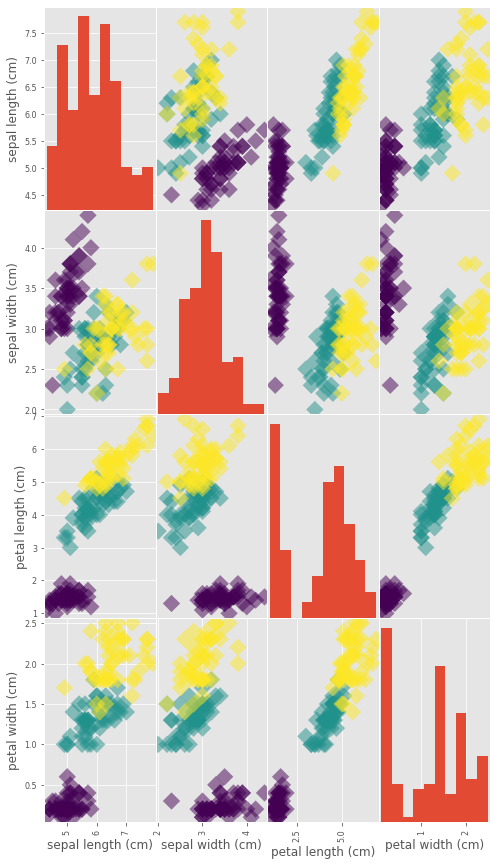

In [0]:
pd.plotting.scatter_matrix(df, c = y, figsize=[8,15], s = 150, marker= 'D')

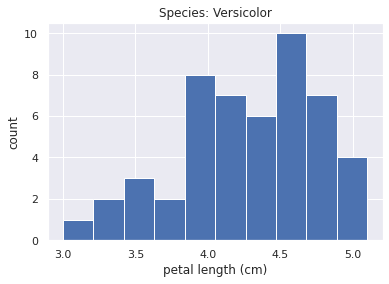

In [0]:
df['species'] = pd.DataFrame(y, columns = ['species'])
versi = df[df['species'] == 1]
setosa = df[df['species'] == 0]
virgi = df[df['species'] == 2]

sns.set()
plt.hist(versi['petal length (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.title('Species: Versicolor')
plt.show()

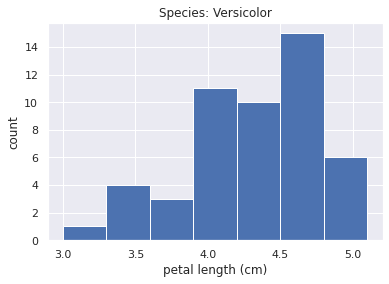

In [0]:
n_data = len(versi)
n_bins = int(np.sqrt(n_data))
plt.hist(versi['petal length (cm)'], bins=n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.title('Species: Versicolor')
plt.show()

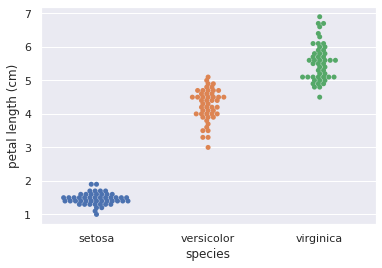

In [0]:
df['species1'] = pd.to_numeric(df['species'])
df['species1'] = df['species1'].replace({0:'setosa', 1:'versicolor', 2:'virginica'})

sns.swarmplot(data = df, x = 'species1', y = 'petal length (cm)') # becomes cluttered for large data points
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

In [0]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points:
    n = len(data)

    # x-data for the ECDF:
    x = np.sort(data)

    # y-data for the ECDF:
    y = np.arange(1, n+1) / n

    return x, y

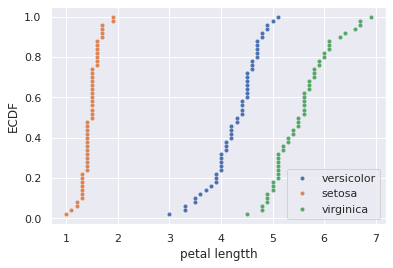

In [0]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versi['petal length (cm)'])
x_set, y_set = ecdf(setosa['petal length (cm)'])
x_vir, y_vir = ecdf(virgi['petal length (cm)'])

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vir, y_vir, marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal lengtth')
plt.ylabel('ECDF')
plt.legend(('versicolor','setosa','virginica'), loc='lower right')

# Display the plot
plt.show()

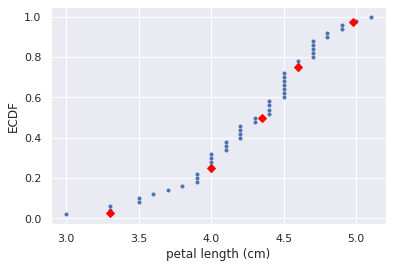

In [0]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles:
ptiles_vers = np.percentile(versi['petal length (cm)'], percentiles)

# Plotting these percentiles
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()

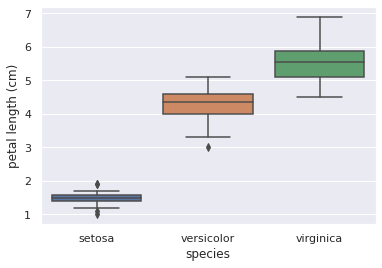

In [0]:
sns.boxplot(data = df, x = 'species1', y = 'petal length (cm)') # becomes cluttered for large data points
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

In [0]:
def pearson_r(x, y):
    # Compute correlation matrix:
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(versi['petal length (cm)'], versi['petal width (cm)'])
print(r)

0.7866680885228169


In [0]:
iris['data'].shape

(150, 4)

In [0]:
iris['target'].shape

(150,)

In [0]:
x_new = np.array([
    [5.6,2.8,3.9,1.1],
    [5.7,2.6,3.8,1.3],
    [4.7,3.2,1.3,0.2]
    ])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [0]:
X = df.drop(['species1','species'], axis=1)
y = df['species']

In [0]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(x_new)
print(y_pred)

[1 1 0]


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [0]:
def knn_range(neighbors):
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
  for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)
  return train_accuracy, test_accuracy

In [0]:
neighbors = np.arange(1, 9)
train_acc, test_acc = knn_range(neighbors)

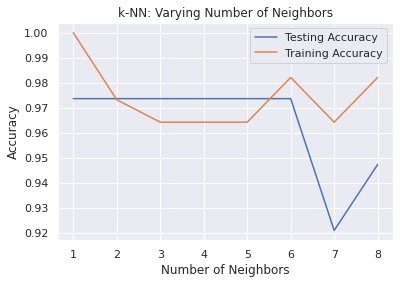

In [0]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_acc, label = 'Testing Accuracy')
plt.plot(neighbors, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()